In [1]:
import stanza
import nltk
import numpy as np
from textblob import TextBlob

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

Loading the language model for stanza

In [4]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment',verbose=False)

Tokenize the text in sentences and remove the stop words in each sentence.

In [5]:
filename = open('TrumpSpeech_20200618.txt', 'r')
stop_words = set(stopwords.words('english'))  
Lines = filename.readlines()
df_speech = []
for line in Lines:
    sentences = nltk.sent_tokenize(line)
    for sent in sentences:
        word_tokens = word_tokenize(sent)  
        filtered_sentence = [w for w in word_tokens if not w in stop_words]  
        x = ''
        for word in filtered_sentence:
            x +=' '+word
        df_speech.append(x)

In [7]:
df = pd.DataFrame(df_speech)
df.columns = ['text']

In [9]:
df['sentiment_stanza']=''
df['sentiment_blob'] = ''

In [ ]:
df.head()

In [11]:
# I prefer to have -1 for negative and +1 for positive, since stanza is produced 0,1 and 2. I correct this.

for idx in df.index:
    doc = nlp(df.loc[idx,'text'])
    for i, sentence in enumerate(doc.sentences):
        df.loc[idx,'sentiment_stanza']=float(sentence.sentiment-1)

In [13]:
def blob_sentiment(txt):
    sent = TextBlob(txt).sentiment.polarity
    return sent

In [14]:
df['sentiment_blob'] = df['text'].apply(lambda x : blob_sentiment(x))

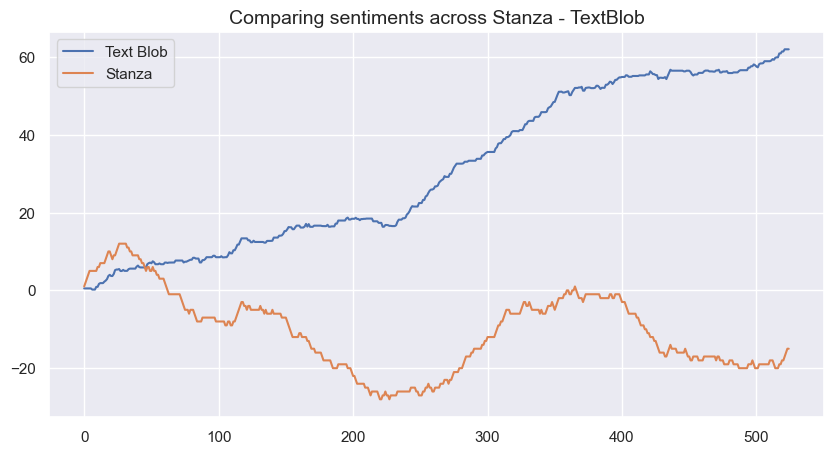

In [17]:
fig , ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(np.arange(0,len(df)),df['sentiment_blob'].cumsum(),label='Text Blob')
ax.plot(np.arange(0,len(df)),df['sentiment_stanza'].cumsum(),label='Stanza')
ax.legend();
ax.set_title('Comparing sentiments across Stanza - TextBlob',fontsize=14);

In [ ]:
df.head()

In [ ]:
idx = (df['sentiment_stanza']==1) & (df['text'].count()>5) & (df['sentiment_blob']<0)

In [ ]:
df.loc[idx,['text']].values